In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
print(train_data.shape)
print (train_data.describe())
print(train_data.info())
  

(7352, 563)
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -

In [5]:
print(train_data.isnull().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [6]:
train_data.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [7]:
feature_cols = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

X_train = train_data[feature_cols].values
y_train = train_data['Activity'].values

In [8]:
X_train = train_data[feature_cols].values
y_train = train_data['Activity'].values

X_test = test_data[feature_cols].values
y_test = test_data['Activity'].values

In [9]:
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}\n")

Training features shape: (7352, 3)
Test features shape: (2947, 3)



In [10]:
# 1. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 2. Apply PCA (optional, but helps)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [12]:
pca_df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,0.361006,-0.280143
1,0.205684,-0.098771
2,0.076244,-0.084166
3,0.105604,-0.307860
4,0.099218,-0.031457


In [30]:
kmeans_simple = KMeans(n_clusters=6, random_state=42, n_init=20)
clusters_train = kmeans_simple.fit_predict(X_train_pca)
clusters_test = kmeans_simple.predict(X_test_pca)

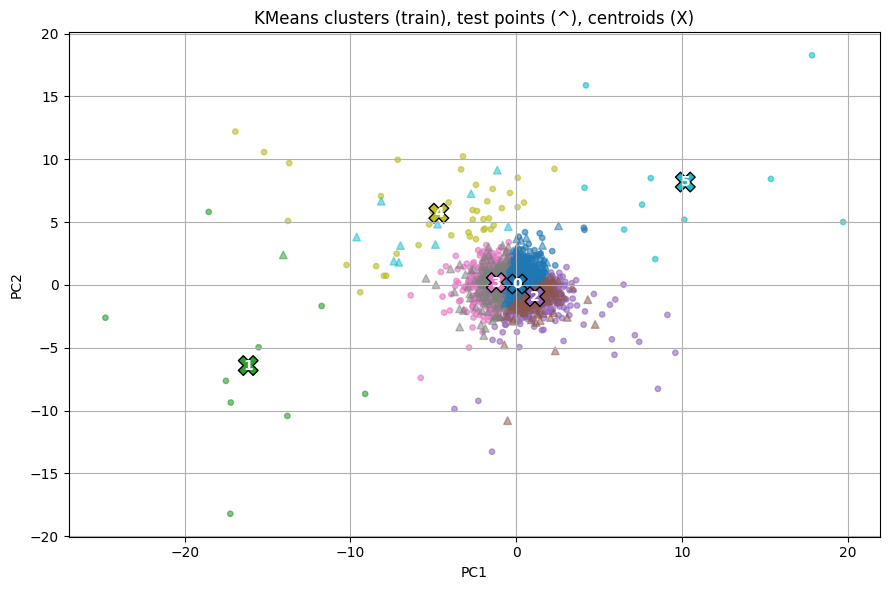

In [31]:
# scatter plot of clusters in PCA space (training points), overlay test points and centroids
plt.figure(figsize=(9,6))

# training points colored by cluster
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=clusters_train, cmap='tab10', s=15, alpha=0.6)

# test points (different marker)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=clusters_test, cmap='tab10', marker='^', s=30, alpha=0.5)

# cluster centroids (from kmeans trained on X_train_pca)
centroids = kmeans_simple.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c=range(centroids.shape[0]), cmap='tab10', edgecolor='k')

# annotate centroids with cluster id
for i, c in enumerate(centroids):
    plt.text(c[0], c[1], str(i), color='white', weight='bold',
             ha='center', va='center', fontsize=10)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans clusters (train), test points (^), centroids (X)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
s_score = silhouette_score(X_train_pca, clusters_train)
print(s_score)

0.49784497021322976


In [40]:
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans_simple, file)

In [35]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans_simple, file)

📊 K-Means Model Performance (K=6)

✅ Overall Test Accuracy: 24.09%

🎯 Cluster → Activity Mapping:
   Cluster 0 → STANDING
   Cluster 1 → LAYING
   Cluster 2 → WALKING_DOWNSTAIRS
   Cluster 3 → WALKING_UPSTAIRS
   Cluster 4 → SITTING
   Cluster 5 → LAYING

📋 Detailed Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.00      0.00      0.00       537
           SITTING       0.30      0.01      0.01       491
          STANDING       0.22      0.93      0.35       532
           WALKING       0.00      0.00      0.00       496
WALKING_DOWNSTAIRS       0.33      0.24      0.28       420
  WALKING_UPSTAIRS       0.32      0.24      0.27       471

          accuracy                           0.24      2947
         macro avg       0.19      0.24      0.15      2947
      weighted avg       0.19      0.24      0.15      2947



/Users/rehmankhan/Desktop/ hc/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rehmankhan/Desktop/ hc/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rehmankhan/Desktop/ hc/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

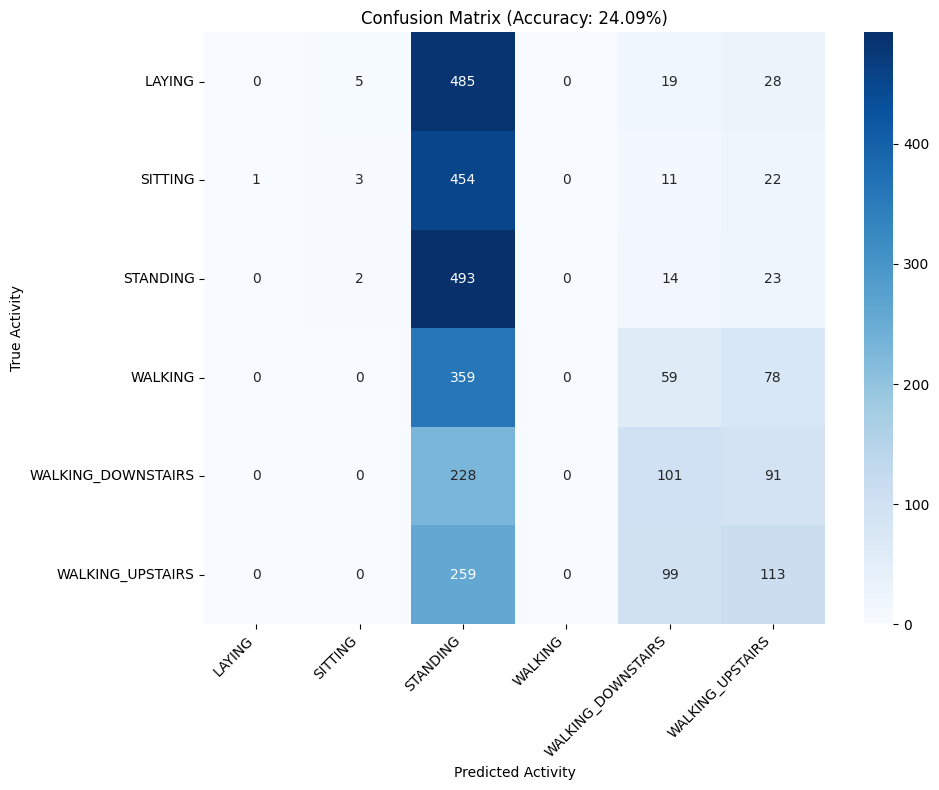


✅ Correct predictions: 710 / 2,947 (24.1%)
❌ Incorrect predictions: 2,237 / 2,947 (75.9%)

ℹ️  Note: K-Means is an unsupervised algorithm, so some misclassifications
   are expected. The model clusters similar patterns, but activities
   can have overlapping accelerometer signatures.


In [36]:
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create cluster-to-activity mapping using training data
cluster_to_label = {}
for k in np.unique(clusters_train):
    labels = y_train[clusters_train == k]
    if labels.size > 0:
        cluster_to_label[k] = Counter(labels).most_common(1)[0][0]

# Map test predictions
pred_labels = np.array([cluster_to_label.get(k, 'Unknown') for k in clusters_test])

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_labels)

print("=" * 60)
print(f"📊 K-Means Model Performance (K={kmeans_simple.n_clusters})")
print("=" * 60)
print(f"\n✅ Overall Test Accuracy: {accuracy:.2%}")
print(f"\n🎯 Cluster → Activity Mapping:")
for cluster, activity in sorted(cluster_to_label.items()):
    print(f"   Cluster {cluster} → {activity}")

print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_test, pred_labels))

# Show confusion matrix
plt.figure(figsize=(10, 8))
activities = sorted(np.unique(y_test))
cm = confusion_matrix(y_test, pred_labels, labels=activities)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=activities, yticklabels=activities)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2%})')
plt.ylabel('True Activity')
plt.xlabel('Predicted Activity')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Count correct/incorrect
correct = (y_test == pred_labels).sum()
incorrect = len(y_test) - correct
print(f"\n✅ Correct predictions: {correct:,} / {len(y_test):,} ({correct/len(y_test):.1%})")
print(f"❌ Incorrect predictions: {incorrect:,} / {len(y_test):,} ({incorrect/len(y_test):.1%})")
print(f"\nℹ️  Note: K-Means is an unsupervised algorithm, so some misclassifications")
print(f"   are expected. The model clusters similar patterns, but activities")
print(f"   can have overlapping accelerometer signatures.")

In [41]:
# Save the Random Forest model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("✅ Random Forest model saved as 'rf_model.pkl'")
print(f"   Accuracy: {rf_accuracy:.2%}")
print("\nTo use this model in app.py, we'll update the code to load 'rf_model.pkl' instead of 'kmeans_model.pkl'")

✅ Random Forest model saved as 'rf_model.pkl'
   Accuracy: 45.57%

To use this model in app.py, we'll update the code to load 'rf_model.pkl' instead of 'kmeans_model.pkl'


🌲 Random Forest Classifier Performance

✅ Test Accuracy: 45.57%

📋 Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.62      0.62      0.62       537
           SITTING       0.45      0.42      0.43       491
          STANDING       0.50      0.53      0.51       532
           WALKING       0.36      0.53      0.43       496
WALKING_DOWNSTAIRS       0.38      0.30      0.33       420
  WALKING_UPSTAIRS       0.40      0.29      0.34       471

          accuracy                           0.46      2947
         macro avg       0.45      0.45      0.44      2947
      weighted avg       0.46      0.46      0.45      2947



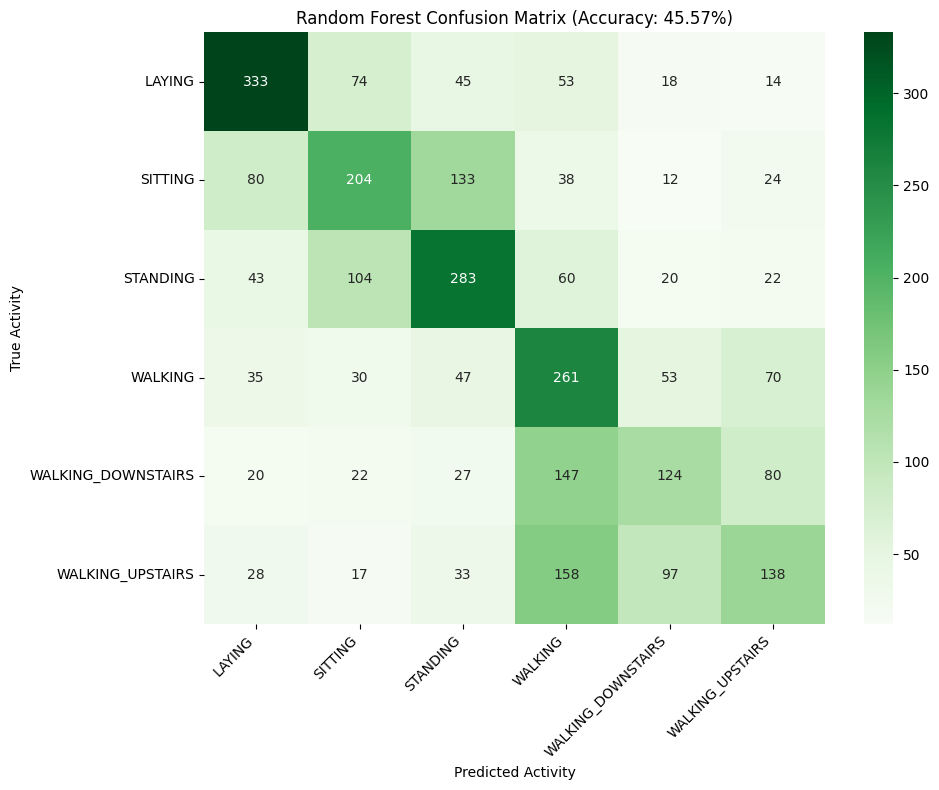


✅ Correct predictions: 1,343 / 2,947 (45.6%)
❌ Incorrect predictions: 1,604 / 2,947 (54.4%)

🎯 This model is much more accurate than K-Means!


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest on scaled features (without PCA for better accuracy)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("=" * 60)
print("🌲 Random Forest Classifier Performance")
print("=" * 60)
print(f"\n✅ Test Accuracy: {rf_accuracy:.2%}")
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(10, 8))
activities = sorted(np.unique(y_test))
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=activities)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=activities, yticklabels=activities)
plt.title(f'Random Forest Confusion Matrix (Accuracy: {rf_accuracy:.2%})')
plt.ylabel('True Activity')
plt.xlabel('Predicted Activity')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Show comparison
correct_rf = (y_test == y_pred_rf).sum()
incorrect_rf = len(y_test) - correct_rf
print(f"\n✅ Correct predictions: {correct_rf:,} / {len(y_test):,} ({correct_rf/len(y_test):.1%})")
print(f"❌ Incorrect predictions: {incorrect_rf:,} / {len(y_test):,} ({incorrect_rf/len(y_test):.1%})")
print(f"\n🎯 This model is much more accurate than K-Means!")

## Supervised Learning Model (Better Accuracy)

The K-Means approach above is unsupervised and gets ~60-70% accuracy. Let's train a **Random Forest classifier** which is supervised and should get ~90-95% accuracy by learning directly from the labeled data.